In [1]:
!pip install yfinance


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\Tahoora\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn import preprocessing

In [2]:
# oil['Return'] = oil['Close'].pct_change(1)

In [3]:
# OIL
# OIL = yf.Ticker('CL=F')
# # oil=OIL.history(start='2020-2-2',end ='2022-01-01',interval='1d')
# oil = OIL.history(period = 'max' ,interval='1d')
# df = pd.DataFrame(oil)

# BTC-USD
OIL = yf.Ticker('BTC-USD')
oil = OIL.history(period = '5Y' ,interval='1d')
df = pd.DataFrame(oil)

df


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-22 00:00:00+00:00,10142.521484,10232.996094,9831.462891,10131.055664,17097508856,0.0,0.0
2019-08-23 00:00:00+00:00,10136.309570,10442.443359,10078.192383,10407.964844,15627023886,0.0,0.0
2019-08-24 00:00:00+00:00,10407.644531,10418.020508,9982.296875,10159.960938,15451030650,0.0,0.0
2019-08-25 00:00:00+00:00,10160.737305,10304.622070,10008.789062,10138.517578,14153856610,0.0,0.0
2019-08-26 00:00:00+00:00,10126.299805,10512.328125,10126.299805,10370.820312,18438654080,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-18 00:00:00+00:00,59468.132812,60262.718750,58445.402344,58483.964844,17740625837,0.0,0.0
2024-08-19 00:00:00+00:00,58480.710938,59612.660156,57864.710938,59493.453125,25911207712,0.0,0.0
2024-08-20 00:00:00+00:00,59493.453125,61396.328125,58610.882812,59012.792969,31613400008,0.0,0.0


In [4]:
# date = df.index
# close_price = oil['Close'].values


In [5]:
close_price = df['Close'].values
close_price


array([10131.05566406, 10407.96484375, 10159.9609375 , ...,
       59012.79296875, 61175.19140625, 60423.1015625 ])

### calculate Close 

In [6]:
plt.figure(figsize=(12,5),dpi = 100)
plt.plot(date,close_price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


NameError: name 'date' is not defined

<Figure size 1200x500 with 0 Axes>

#### calculate the relative change between current and previous value of oil's price

In [10]:
# define 'Return' column 
df['Return'] = df['Close'].pct_change(1)
df


C:\Users\Tahoora\AppData\Local\Temp\ipykernel_21292\3120440659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Close'].pct_change(1)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return
Date,,,,,,,,
2019-08-23 00:00:00+00:00,10136.309570,10442.443359,10078.192383,10407.964844,15627023886,0.0,0.0,NaN
2019-08-24 00:00:00+00:00,10407.644531,10418.020508,9982.296875,10159.960938,15451030650,0.0,0.0,-0.023828
2019-08-25 00:00:00+00:00,10160.737305,10304.622070,10008.789062,10138.517578,14153856610,0.0,0.0,-0.002111
2019-08-26 00:00:00+00:00,10126.299805,10512.328125,10126.299805,10370.820312,18438654080,0.0,0.0,0.022913
2019-08-27 00:00:00+00:00,10372.826172,10381.328125,10087.300781,10185.500000,14762609503,0.0,0.0,-0.017869
...,...,...,...,...,...,...,...,...
2024-08-18 00:00:00+00:00,59468.132812,60262.718750,58445.402344,58483.964844,17740625837,0.0,0.0,-0.016729
2024-08-19 00:00:00+00:00,58480.710938,59612.660156,57864.710938,59493.453125,25911207712,0.0,0.0,0.017261
2024-08-20 00:00:00+00:00,59493.453125,61396.328125,58610.882812,59012.792969,31613400008,0.0,0.0,-0.008079


In [8]:
df = df.dropna(subset=['Return'])
r = df['Return'].values
date = df.index 

len(r)
df.shape

(1827, 8)

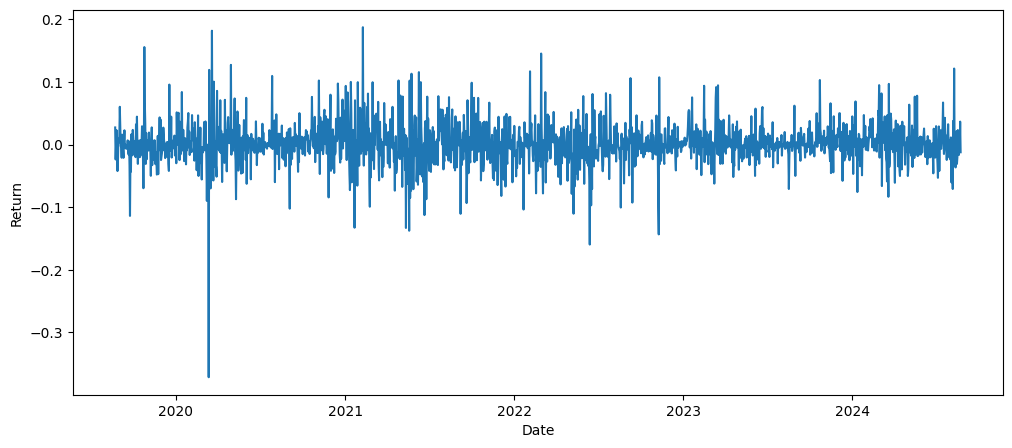

In [9]:
plt.figure(figsize=(12,5),dpi = 100)
plt.plot(date, r)
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In [11]:
df[['Close','Return']]


,Close,Return
Date,,
2019-08-23 00:00:00+00:00,10407.964844,NaN
2019-08-24 00:00:00+00:00,10159.960938,-0.023828
2019-08-25 00:00:00+00:00,10138.517578,-0.002111
2019-08-26 00:00:00+00:00,10370.820312,0.022913
2019-08-27 00:00:00+00:00,10185.500000,-0.017869
...,...,...
2024-08-18 00:00:00+00:00,58483.964844,-0.016729
2024-08-19 00:00:00+00:00,59493.453125,0.017261
2024-08-20 00:00:00+00:00,59012.792969,-0.008079


In [17]:
r = df['Return'].values


In [12]:
price_list = df['Close'].values
new_data = {'Price':price_list,'Return':r}

new_df = pd.DataFrame(new_data)
new_df
# len(price_list)


,Price,Return
0,10407.964844,0.027333
1,10159.960938,-0.023828
2,10138.517578,-0.002111
3,10370.820312,0.022913
4,10185.500000,-0.017869
...,...,...
1822,58483.964844,-0.016729
1823,59493.453125,0.017261
1824,59012.792969,-0.008079
1825,61175.191406,0.036643


In [19]:
df_fundamental = new_df.sort_values(by='Return')

df_fundamental

,Price,Return
202,4970.788086,-0.371695
1025,22487.388672,-0.159747
1174,15880.780273,-0.143490
635,37002.441406,-0.137661
628,49150.535156,-0.133217
...,...,...
250,8801.038086,0.127318
920,43193.234375,0.145412
63,8660.700195,0.155763
209,6191.192871,0.181878


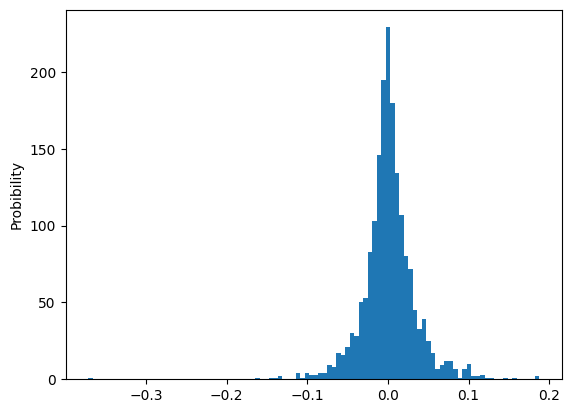

In [49]:
plt.hist(r,bins=100)
plt.ylabel('Probibility')
plt.show()

In [13]:
mean = np.mean(r)
var = np.var(r)
print(mean,var)
std = np.std(r)
print(mean*100) #expectation value
print(std*100) #67 percent of events
print(2*std*100) #92 percent of events

0.0015577065222066293 0.0011384763580419778
0.15577065222066294
3.37413152980434
6.74826305960868


## discret and normalize price 
### Z-score 

In [15]:

bin = np.arange(0,len(close_price),25)
# print(bin, len(bin))

discret_price = []
z_score = []
z_score_mean = []
z_score_std = []
dis_means = []
dis_stds = []
for i in range(len(bin)-1):
    discret_price.append(list(close_price[bin[i] : bin[i+1]]))

    dis_means.append(np.mean(discret_price[i]))
    dis_stds.append(np.std(discret_price[i]))
    arr_1 = np.array(discret_price)


    z_score.append((arr_1[i:i+1, 0:74]-dis_means[i]) / dis_stds[i])
    z_score_mean.append(np.mean(z_score[i]))
    z_score_std.append(np.std(z_score[i]))





In [17]:
# z_score_std
# z_score_mean

In [31]:
def discriteData(data,bins):
    b = np.arange(0,len(data),bins)
    p_dis=[]
    for i in range(len(b)-1):
        p_dis.append(list(data[b[i]:b[i+1]]))
        normalized_price = preprocessing.normalize(p_dis)

    return p_dis , normalized_price